In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [59]:
data = pd.read_csv("datasets/Social_Network_Ads.csv")

In [60]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [62]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [63]:
data.drop('User ID', axis = 1, inplace = True)

In [64]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [65]:
dummy_genders = pd.get_dummies(data['Gender'], dtype = int)

In [66]:
dummy_genders.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [67]:
data = pd.concat([data, dummy_genders], axis = 1)

In [68]:
data.head()

,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [69]:
data.drop('Gender', inplace = True, axis = 1)

In [70]:
data.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])

In [73]:
data.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,-1.490046,0,0,1
1,35,-1.460681,0,0,1
2,26,-0.785290,0,1,0
3,27,-0.374182,0,1,0
4,19,0.183751,0,0,1


In [94]:
X = data.drop("Purchased", axis = 1)
y = np.asarray(data["Purchased"])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [96]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
cm = confusion_matrix(y_test, y_pred)

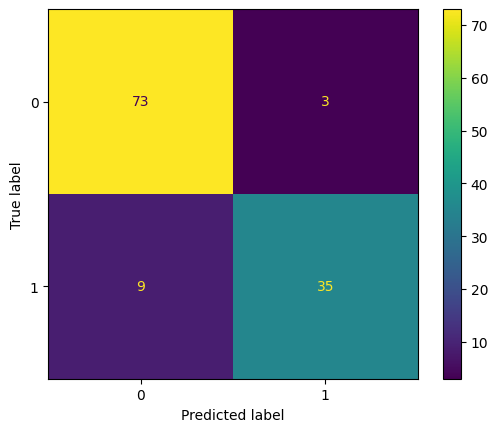

In [102]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [103]:
accuracy_score(y_test, y_pred)

0.9

In [104]:
y_test = np.asarray(y_test)
y_pred = np.asarray(y_pred)

In [105]:
tp = ((y_pred == 0) & (y_test == 0)).sum()
tn = ((y_pred == 1) & (y_test == 1)).sum()
fp = ((y_pred == 0) & (y_test == 1)).sum()
fn = ((y_pred == 1) & (y_test == 0)).sum()

In [106]:
[tp, tn, fp, fn]

[73, 35, 9, 3]

In [107]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
error = 1 - accuracy
f1 = (2 * recall * precision)/(precision + recall)

In [108]:
print("Precision" , precision)
print("Recall" , recall)
print("Accuracy" , accuracy)
print("Error rate" , error)
print("F1" , f1)

Precision 0.8902439024390244
Recall 0.9605263157894737
Accuracy 0.9
Error rate 0.09999999999999998
F1 0.9240506329113923


In [88]:
data.shape

(400, 5)